In [1]:
# ---------------- For Developers Only -------------------------------------------------
# ---------------- Check current working directory for the notebooks -------------------
# import os

# # Move one directory up
# os.chdir('..')
# print("Current Directory:", os.getcwd())

Current Directory: G:\github-aditya0by0\stream-viz\stream_viz


In [2]:
# ---------------- For Developers Only -------------------------------------------------
# ---------------- Move one directory up from the current working directory  -----------
# from pathlib import Path
# import os

# # Move one directory up
# current_dir = Path.cwd()
# parent_dir = current_dir.parent
# os.chdir(parent_dir)
# print("Current Directory:", Path.cwd())

Current Directory: G:\github-aditya0by0\stream-viz


## Data Encoder Implementations

Our library includes three distinct implementations for data encoders, each tailored for specific types of data:

1. **`NormalDataEncoder`**: 
    - Designed for normal data, such as *cfpdss*, without any missing values.


2. **`MissingDataEncoder`**: 
   - Suitable for normal data, like *cfpdss*, that may contain missing values.

3. **`KappaStrategyDataEncoder`**: 
   - Tailored for strategy data, such as *experiments*, without any missing values.

#### Inheritance and Common Methods

All the above implementations inherit from the `DataEncoder` abstract class, ensuring they adhere to a common interface. The abstract class enforces the implementation of the following methods:

- **`read_csv_data(filepath_or_buffer, *args, **kwargs)`**: 
  - Reads CSV data from the specified file path and stores it in the `original_data` class attribute. 
  - Internally utilizes the pandas `read_csv` method.

- **`encode_data()`**: 
  - Encodes the data according to the defined process and stores the result in the `encoded_data` class attribute.

#### Special Considerations for Cfpdss Data

For `cfpdss`-related data encoders, there is an additional contract to handle the separation of the target variable from the rest of the data. Thus, the encoded data is stored in separate class attributes:

- **`X_encoded_data`**: Stores the features (input data).
- **`y_encoded_data`**: Stores the target variable.

Therefore, when working with `cfpdss` data encoders, use `X_encoded_data` and `y_encoded_data` instead of the `encoded_data` attribute mentioned above.

---

In [12]:
from stream_viz.data_encoders.cfpdss_data_encoder import NormalDataEncoder
from stream_viz.utils.constants import _NORMAL_DATA_PATH  # Variable only for developers

normal_encoder = NormalDataEncoder()
# Here, add path to your file, the below variable is for internal use only.
# Add relevant/neccessary parameters supported by pandas.read_csv, if required
normal_encoder.read_csv_data(filepath_or_buffer=_NORMAL_DATA_PATH)
normal_encoder.encode_data()
normal_encoder.X_encoded_data.head()

,c5_b,c6_b,c7_b,c8_b,c9_b,n0,n1,n2,n3,n4
0,0,0,1,0,0,0.528245,0.598345,0.558432,0.482846,0.612024
1,0,0,0,1,1,0.662432,0.423329,0.487623,0.454495,0.452664
2,0,0,0,1,1,0.562990,0.576429,0.545916,0.370166,0.543403
3,0,0,0,1,1,0.475311,0.566046,0.539992,0.421434,0.544852
4,1,0,0,1,0,0.370579,0.554642,0.536804,0.223743,0.392332


In [3]:
from stream_viz.data_encoders.cfpdss_data_encoder import MissingDataEncoder
from stream_viz.utils.constants import (
    _MISSING_DATA_PATH,
)  # Variable only for developers

missing_encoder = MissingDataEncoder()
missing_encoder.read_csv_data(
    filepath_or_buffer=_MISSING_DATA_PATH,  # Here, add path to your file, this variable is for internal use only.
    index_col=[
        0
    ],  # Add relevant/neccessary parameters supported by pandas.read_csv, if required
)
missing_encoder.encode_data()
missing_encoder.X_encoded_data.head()

,c5_b,c6_b,c7_b,c8_b,c9_b,n0,n1,n2,n3,n4
0,0.0,0.0,1.0,0.0,0.0,0.530356,0.598345,0.519161,0.478557,0.620371
1,0.0,0.0,0.0,1.0,1.0,0.672618,0.423329,0.442055,0.449888,0.458838
2,0.0,0.0,0.0,1.0,1.0,0.567192,0.576429,0.505532,0.364614,0.550814
3,0.0,0.0,0.0,1.0,1.0,0.474236,0.566046,0.499081,0.416457,0.552283
4,1.0,0.0,0.0,1.0,0.0,0.363202,0.554642,0.495610,0.216550,0.397683


In [7]:
from stream_viz.data_encoders.strategy_data_encoder import KappaStrategyDataEncoder
from stream_viz.utils.constants import (
    _LEARNING_STRATEGY_DATA_PATH,
)  # Variable only for developers

kappa_encoder = KappaStrategyDataEncoder()
kappa_encoder.read_csv_data(
    filepath_or_buffer=_LEARNING_STRATEGY_DATA_PATH,  # Here, add path to your file, this variable is for internal use only.
    header=[
        0,
        1,
        2,
    ],  # Add relevant/neccessary parameters supported by pandas.read_csv, if required
    index_col=[0, 1],
)
kappa_encoder.encode_data()
kappa_encoder.encoded_data.head()

,model_all,model_optimal,model_label,model_feat,model_nafa,model_smraed_catc,model_smraed_sumc,model_smraed_prioc,model_smraed_
Batch_Start,,,,,,,,,
50,0.593128,0.593128,0.432892,0.593128,0.432892,0.257426,0.257426,0.432892,0.593128
100,0.447950,0.409449,0.294671,0.332810,0.296875,0.334898,0.296875,0.221184,0.334898
150,0.838710,0.919614,0.388254,0.676375,0.384236,0.592834,0.634146,0.592834,0.426230
200,0.880000,0.840000,0.720000,0.760000,0.360000,0.680000,0.680000,0.680000,0.520000
250,0.918831,0.959612,0.720000,0.708819,0.295775,0.672131,0.708819,0.672131,0.573379


## Plotter Contract

All implementations that involve plotting graphs or figures must adhere to the **`Plotter`** contract. This contract enforces the use of a **`plot`** method to generate the figure according to the class's specific logic.

#### Key Benefits

- **Consistency**: Standardizing the method name across all plotting classes ensures that users don't need to remember different method names for various implementations. Each subclass must implement the `plot` method, making the API predictable and straightforward.
- **Ease of Use**: Users can invoke the plot method with a consistent syntax: `'your_class_object'.plot(*args, **kwargs)`. This uniformity simplifies the process of generating plots and enhances the overall user experience.
- **Maintainability**: Adhering to a common interface makes it easier to maintain and extend the library. All plotting classes follow the same method signature, streamlining both development and debugging.

#### Example Usage

Here’s an example demonstrating how to use the `plot` method with an instance of a class implementing the Plotter```python:

```python
# Assuming 'YourClass' is a subclass implementing the Plotter contract
your_class_instance = YourClass()
your_class_instanck

```

---yword_arg=value)


## Drift Detection 

For effective drift detection, we utilize implementations of two abstract classes:

1. **`DriftDetector(Plotter)`**:
    - **`update`**: This method is called at each stream time point from a `Streamer` implementation. It must update the drift mechanism with a new data point at each call. This is essential for keeping the detector current with incoming data.
    - **`detect_drift`**: This abstract method should implement the core logic of the drift detection mechanism. Different detection techniques will have their unique implementations of this method.
    - **`plot`**: Plots the relevant figure for the drifts of the implementation. Visualization is key to understanding and analyzing detected drifts.

2. **`Streamer`**:
    - **Constructor**: Takes the drift detection mechanism (following the above contract) as input. This ensures that the streamer is linked with the appropriate drift detection logic.
    - **`stream_data(X_dataframe, y_df)`**: This method takes the whole dataset as input and starts streaming the data. During streaming, it sequentially processes the data points.
    - **Streaming Logic**: Within this logic, the streamer calls the `update` method of the `DriftDetector` contract, passing the relevant data at each stream time point. This interaction is crucial for real-time drift detection.

### Key Classes

- **RealConceptDriftDetector**: This class implements the `DriftDetector` for detecting real concept drifts. It leverages specific algorithms tailored to identifying changes in the conditional probability distribution \(p(y|X)\).
- **DataStreamer**: This class implements the `Streamer` and handles the streaming of data. It ensures that data is fed into the drift detector in a sequential and timely manner.

### Note

- For real concept drift detection, we currently have the `RealConceptDriftDetector` class. 
- For streaming the data, we use the `DataStreamer` class.

By following these contracts and using the provided classes, we can systematically detect and visualize drifts in streaming data, allowing for timely interventions and adjustments in our models and systems.

---

## 1.  Real Concept Drift

Real concept drift refers to changes in the conditional probability distribution $p(y|X)$, which affects the decision boundaries or the target concept. For example, a user's interest in news articles may shift from dwelling houses to holiday homes over time.

#### McDiarmid Drift Detection Method (MDDM)

The **McDiarmid Drift Detection Method (MDDM)** is a technique used to detect real concept drifts. It applies McDiarmid’s inequality and utilizes a sliding window approach to monitor changes in data streams. Key features of MDDM include:

- **Sliding Window Approach**: MDDM processes data in a sliding window to continuously evaluate changes and detect drifts.

- **Weighting Scheme for Elements in the Window**:
  - **Arithmetic Weighting**: 
    - Weights are defined as $w_{i} = 1 + (i + d)$, where $d \geq 0$ is the difference between two consecutive weights. This scheme increases weights linearly with the index of the element.
  - **Geometric Weighting**: 
    - Weights are defined as $w_{i} = r^{(i−1)}$, where $r \geq 1$ is the ratio between two consecutive weights. This scheme increases weights exponentially.
  - **Euler Weighting**: 
    - Weights are defined as $w_{i} = r^{(i−1)}$ with $r = e^{λ}$, where $λ \geq 0$. This scheme also increases weights exponentially but uses the base of the natural logarithm.

These weighting schemes help assign different levels of importance to the elements within the slowing sensitive drift detectioni drif

or sensitiv
e--- For further details, refe<a href="https://arxiv.org/pdf/1710.02030">Pesaranghader, A., Viktor, H.L., & Paquet, E. (2017). McDiarmid Drift Detection Methods for Evolving Data Streams. 2018 International Joint Conference on Neural Networks (IJCNN), 1-9.</a>Neural Networks (rg/pdf/1710.02030)


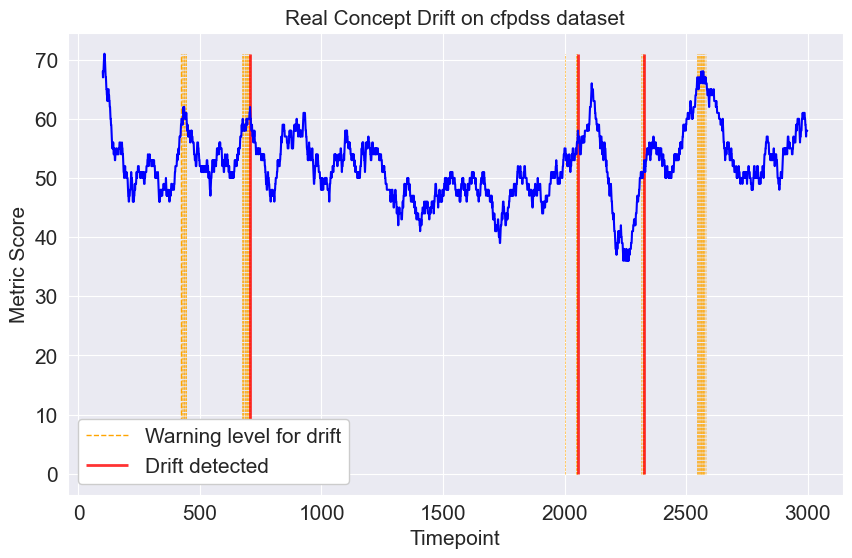

In [8]:
# --------------- Real Concept Drift --------------------------------------------------
from stream_viz.data_streamer import DataStreamer
from stream_viz.real_drift.r_drift_detector import RealConceptDriftDetector

# Initialize DataStreamer with drift detectors
dt_streamer = DataStreamer(
    rcd_detector_obj=RealConceptDriftDetector(),
)

# Stream data and apply drift detection
dt_streamer.stream_data(
    X_df=missing_encoder.X_encoded_data, y_df=missing_encoder.y_encoded_data
)

# Plot results
dt_streamer.rcd_detector_obj.plot(start_tpt=100, end_tpt=3000)

## 2. Feature Drift Detection

## 3. Velocity Plots

## 4. Missingness Plots

In addition to the `Plotter` contract, we have another abstract class named **`InteractivePlot`**. By inheriting this contract, you can create user-friendly interactive plots, allowing you to tune the parameters using buttons, sliders, or other UI elements. This enhances the capability for rigorous visual analysis.

### Implementation Requirements

- **`_add_interactive_plot(*args, **kwargs)`** : Any class implementing this contract must define the `_add_interactive_plot` abstract method to add custom inputs to the interactive plot.
- **`display(*args, **kwargs)`** : You can further customize the interactive plot by overriding the `display` method for specific logic.
- **Feature Display**: By default, the plot displays only the first three features of the dataset, but this can be adjusted through the UI elements.

Additionally, any class implementing the `InteractivePlot` contract must also implement the `Plotter` class or at least the `plot` method inherited from `Plotter`. This ensures consistency and usability across different types of plots.

### Usage Instructions

- **Normal Plot**: Call the `plot` method on your object for a standard plot.
- **Interactive Plot**: Call the `display` method for an interactive plot. This dual functionality lets users choose their preferred visualization method.

### Key Features

- **User-Friendly Interactivity**: Enhance plots with buttons, sliders, and other UI elements for detailed visual analysis.
- **Customizable Inputs**: Implement the `_add_interactive_plot` method to tailor inputs to your plot’s needs.
- **Default Feature Display**: Initially displays the first three features of the dataset, with UI options to adjust.
- **Dual Plotting Functionality**: Easily switch between the standard `plot` method and the interactive `display` method based on user preference.

This framework provides a comprehensive solution for creating both static and interactive plots, enhancing flexibility and ease of use for various data visualization needs.

**_Note_**: As of now, only `HeatMapPlotter` implements this interface.

In [9]:
from stream_viz.data_missingness.missingness import HeatmapPlotter

plotter = HeatmapPlotter(missing_encoder.X_encoded_data)
plotter.display()

Output()

## 5. Learning Strategies Plot

### Strategy Plot
When evaluating various models or strategies on each batch of your dataset, it is common to visualize their performance in a plot. However, when the number of strategies increases, the plot can become cluttered, making it challenging to identify the best-performing strategy at a glance. Below is an example of such a cluttered plot, where the lines representing different strategies overlap, creating visual chaos.

![Cluttered Plot Learning Strategies](/stream_viz/tutorial/learning_strategies_clutter_plot.png)

This cluttered visualization requires manual effort to discern which strategy is performing best in each batch, leading to potential oversight of key insights

---


### Proposed Strategy Plot
The proposed strategy plot addresses this issue by clearly indicating the winning strategy at each batch. Additionally, it shows the margin or difference by which the winning strategy outperforms the second-best strategy. This enhancement not only simplifies the comparison but also highlights the most effective strategy over time, making it easier to identify the overall winner.


- **Winner Indication**: The plot clearly marks the winning strategy at each batch.
- **Margin Highlight**: It also shows the margin or difference between the winner and the second-best strategy, providing a clear quantitative measure of performance
>
This refined visualization aids in quickly spotting trends and making informed decisions without the need for manual inspection


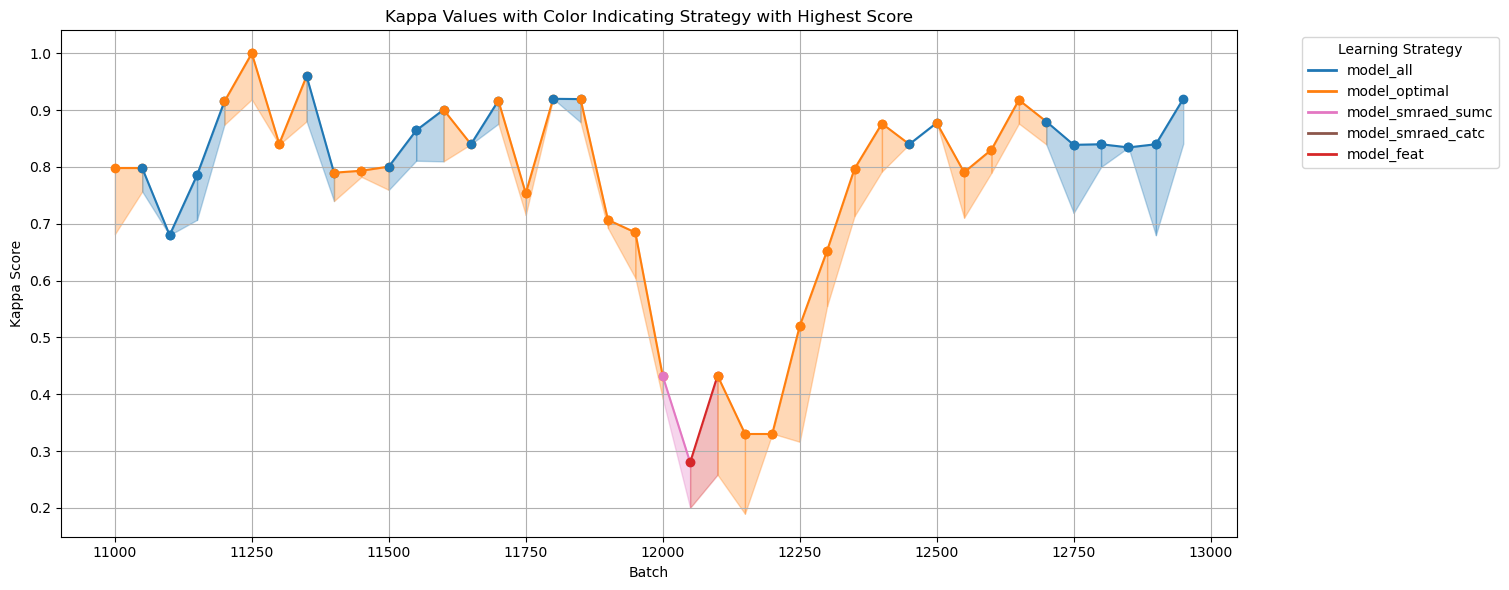

In [8]:
from stream_viz.learning_strategies.strategy_viz import LearningStrategyChart

# Create the learning strategy chart and plot it
LearningStrategyChart(kappa_encoder.encoded_data).plot(start_tpt=11000, end_tpt=12950)